In [2]:
print("This is ICS178 Final project using Python3")

This is ICS178 Final project using Python3


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot as skplt
import scipy
from sklearn import svm, metrics,linear_model, tree, dummy, neighbors, neural_network
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
from numpy import atleast_2d as twod
from numpy import asarray as arr
import warnings
warnings.filterwarnings('ignore') # for deprecated matplotlib functions

In [6]:
#Helper scripts

class MyConfigs:
    features = 0
    classes = 0

def shuffleData(X, Y = None):
    nx, dx = twod(X).shape
    Y = arr(Y).flatten()
    ny = len(Y)
    pi = np.random.permutation(nx)
    X = X[pi, :]
    if ny > 0:
        assert ny == nx, 'shuffleData: X and Y must have the same length'
        Y = Y[pi] if Y.ndim <= 1 else Y[pi, :]
        return X, Y
    return X

In [7]:
path = "/Users/Wenhan/ICS178/poker-hand-training-true.data.txt"
path2 = "/Users/Wenhan/ICS178/poker-hand-testing.data.txt"

train = np.genfromtxt(path,delimiter=",")
test = np.genfromtxt(path2, delimiter=",")

#train = pd.read_csv(filepath_or_buffer="poker-hand-training-true.data", sep=',', header=None)
#test = pd.read_csv(filepath_or_buffer="poker-hand-testing.data", sep=',', header=None)

print(train.shape)
print(test.shape)

(25010, 11)
(1000000, 11)


In [8]:
#Prepare the Data for Training and Testing:
#----------------------------------------------------------------
#Ready the Train Data
data_train = train[:,0:10]
label_train = train[:,10]
temp = label_train
#Ready the Test Data

data_test = test[:,0:10]
label_test = test[:,10]
#----------------------------------------------------------------
# Scaling the Data for our Main Model
#----------------------------------------------------------------
# Scale the Data to Make the NN easier to converge
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(data_train)  
# Transform the training and testing data
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

+---------------+-------+
| Configuration | Value |
+---------------+-------+
|    classes    |   10  |
|    features   |   10  |
+---------------+-------+


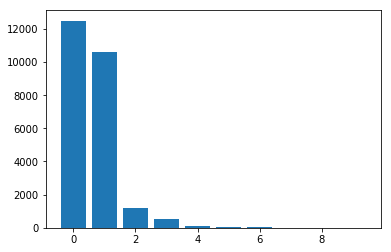

In [9]:
config = MyConfigs()
config.features = data_train.shape[1]
config.classes = len(set(label_train))

table = PrettyTable(['Configuration', 'Value'])
configs = vars(config)
for k in configs:
    table.add_row([k, configs[k]])
print(table)
t = list(temp)
plt.bar(list(range(config.classes)), [t.count(int(x)) for x in range(config.classes)])
plt.show()

In [21]:
models = [  
            linear_model.LogisticRegression(),
            svm.SVC(kernel='linear', C=1)
         ]

model_names = [
                "LogisticRegression",
                "SupportVectorMachine"
              ]

label_names = [
                'Nothing in hand', 'One pair', 'Two pairs', 'Three of a kind', 'Straight', 'Flush', 'Full house', 
                 'Four of a kind', 'Straight flush', ' Royal flush'
              ]

In [22]:
#for model, name in zip(models, model_names):
#    model.fit(data_train, label_train)
#    prediction = model.predict(data_test)
#    accuracy = metrics.accuracy_score(label_test, prediction)
#    print(metrics.classification_report(label_test,prediction,target_names = label_names))

## Dummy Model

In [73]:
#Baseline dummy model (classification)
DC = dummy.DummyClassifier(strategy='most_frequent', random_state=0)
label_predict = DC.fit(data_train, label_train).predict(data_test)
score = DC.score(data_test, label_test)

In [74]:
print(score)
print(metrics.classification_report(label_test,label_predict,target_names = label_names))
print(metrics.confusion_matrix(label_test, label_predict))

0.501209
                 precision    recall  f1-score   support

Nothing in hand       0.50      1.00      0.67    501209
       One pair       0.00      0.00      0.00    422498
      Two pairs       0.00      0.00      0.00     47622
Three of a kind       0.00      0.00      0.00     21121
       Straight       0.00      0.00      0.00      3885
          Flush       0.00      0.00      0.00      1996
     Full house       0.00      0.00      0.00      1424
 Four of a kind       0.00      0.00      0.00       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

      micro avg       0.50      0.50      0.50   1000000
      macro avg       0.05      0.10      0.07   1000000
   weighted avg       0.25      0.50      0.33   1000000

[[501209      0      0      0      0      0      0      0      0      0]
 [422498      0      0      0      0      0      0      0      0      0]
 [ 47622      0      0      0      0      0 

## Logistic Regression

In [ ]:
#Logistic Regression
LRA = linear_model.LogisticRegression()
label_predict = LRA.fit(data_train, label_train).predict(data_test)
score = LRA.score(data_test, label_test)

The accuracy score using Logistic Regression is 0.51184.
                 precision    recall  f1-score   support

Nothing in hand       0.55      0.66      0.60    501209
       One pair       0.46      0.42      0.44    422498
      Two pairs       0.16      0.01      0.02     47622
Three of a kind       0.11      0.01      0.01     21121
       Straight       0.04      0.00      0.00      3885
          Flush       0.58      0.02      0.04      1996
     Full house       0.00      0.00      0.00      1424
 Four of a kind       0.00      0.00      0.00       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

      micro avg       0.51      0.51      0.51   1000000
      macro avg       0.19      0.11      0.11   1000000
   weighted avg       0.48      0.51      0.49   1000000

The mse using Linear Regression is 0.801268.
[[331580 168513    883    197     15     21      0      0      0      0]
 [240299 179459   2025  

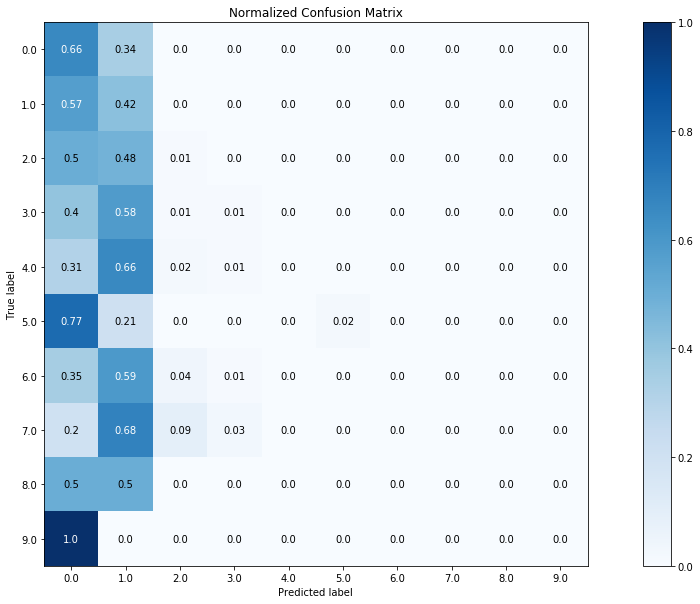

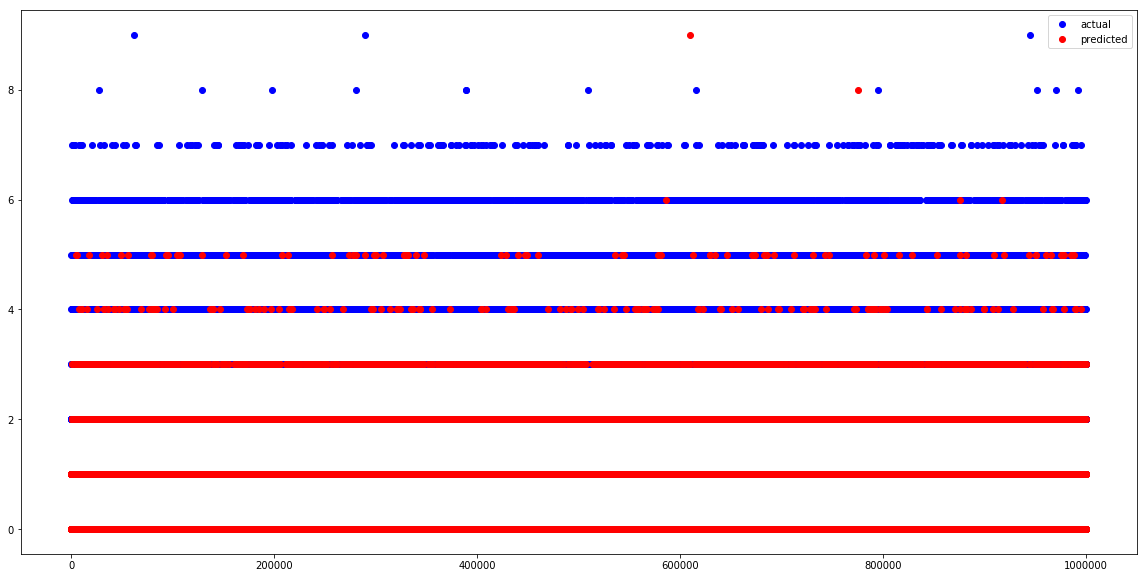

In [68]:
print("The accuracy score using Logistic Regression is {}.".format(score))
print(metrics.classification_report(label_test, label_predict, target_names = label_names))
print("The mse using Linear Regression is {}.".format(metrics.mean_squared_error(label_test,label_predict)))
print(metrics.confusion_matrix(label_test, label_predict))
skplt.metrics.plot_confusion_matrix(label_test, label_predict, normalize=True, figsize=(20,10))

plt.figure(figsize=(20,10))    
plt.plot(label_test, 'bo', label='actual')
plt.plot(label_predict, 'ro', label='predicted')
plt.legend()

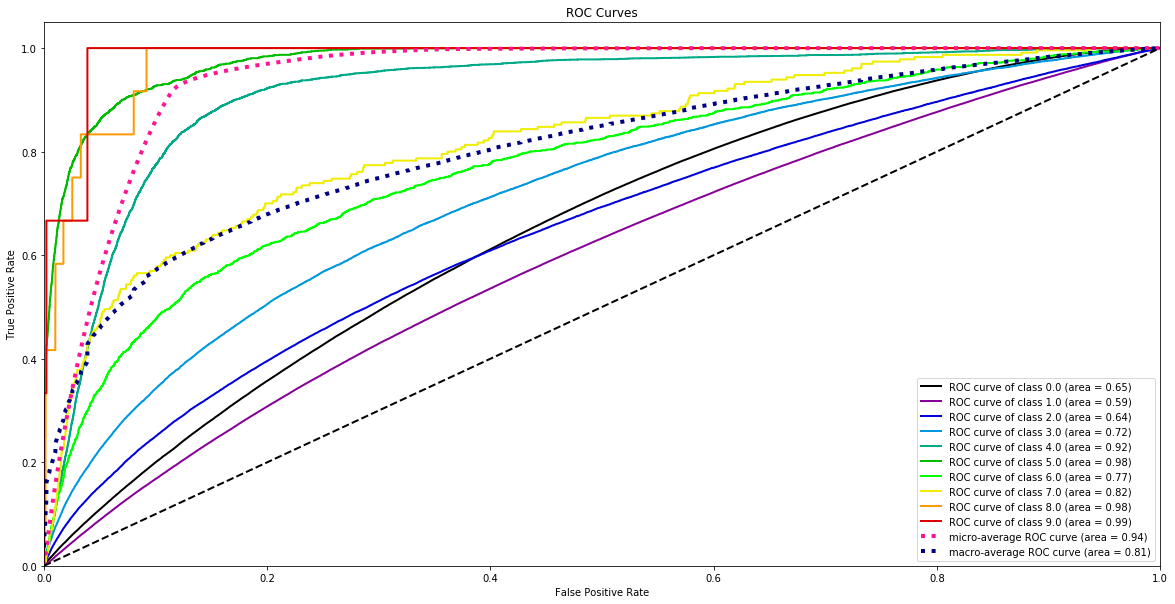

In [69]:
label_predict_prob = SVM.predict_proba(data_test)
skplt.metrics.plot_roc(label_test, label_predict_prob, figsize=(20,10))
plt.show()

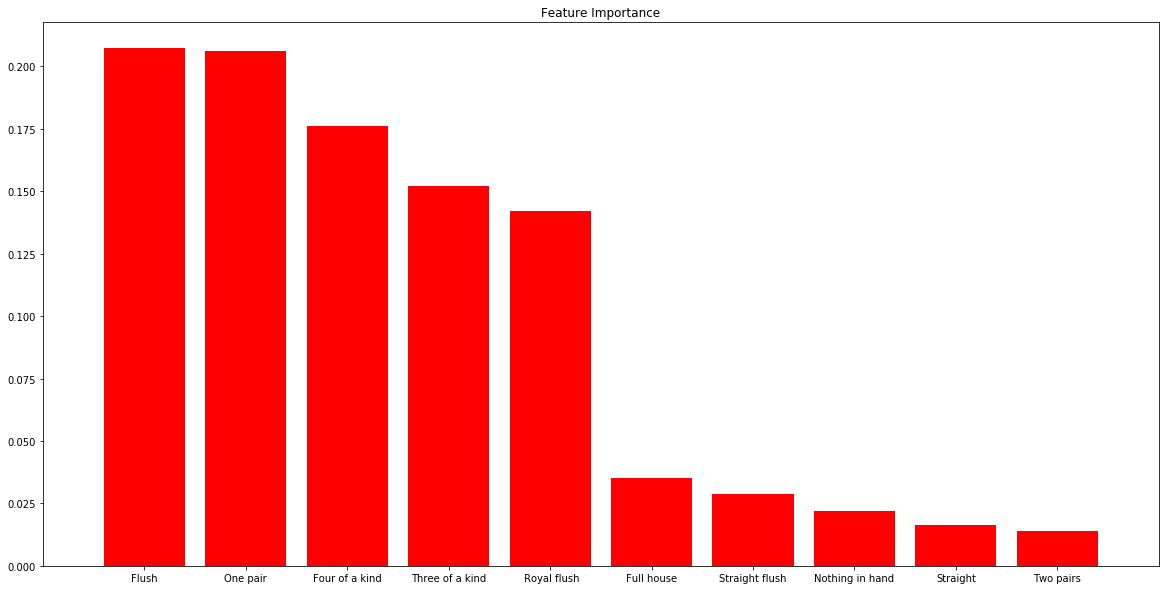

In [70]:
skplt.estimators.plot_feature_importances(Tree, feature_names=label_names, figsize=(20,10))

## SVM linear

In [33]:
#SVM Linear
SVM = svm.SVC(probability=True)
label_predict = SVM.fit(data_train, label_train).predict(data_test)
score = SVM.score(data_test, label_test)

print("The accuracy score using SVM is {}.".format(score))
print("Explained Variance is ",metrics.explained_variance_score(label_test, label_predict))

The accuracy score using SVM is 0.556786.
('Explained Variance is ', -0.05683647091805111)


                 precision    recall  f1-score   support

Nothing in hand       0.55      0.66      0.60    501209
       One pair       0.46      0.42      0.44    422498
      Two pairs       0.16      0.01      0.02     47622
Three of a kind       0.11      0.01      0.01     21121
       Straight       0.04      0.00      0.00      3885
          Flush       0.58      0.02      0.04      1996
     Full house       0.00      0.00      0.00      1424
 Four of a kind       0.00      0.00      0.00       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

      micro avg       0.51      0.51      0.51   1000000
      macro avg       0.19      0.11      0.11   1000000
   weighted avg       0.48      0.51      0.49   1000000

[[331580 168513    883    197     15     21      0      0      0      0]
 [240299 179459   2025    622     78     12      2      0      0      1]
 [ 23706  23081    626    182     25      0      1   

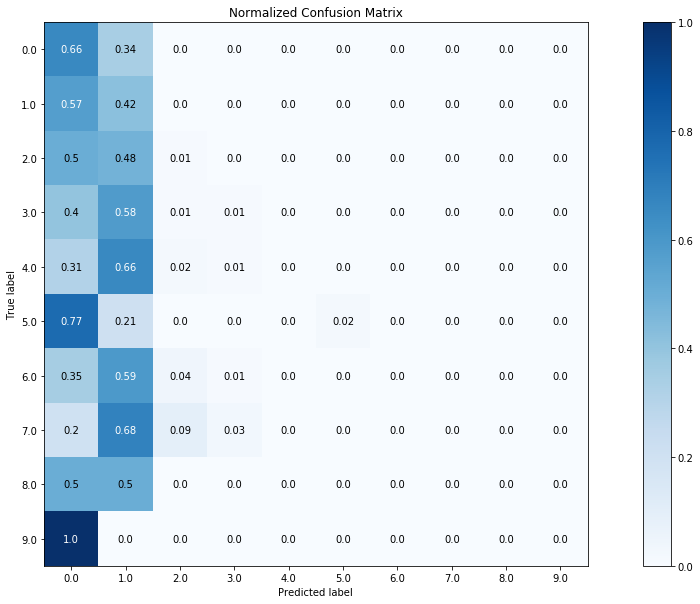

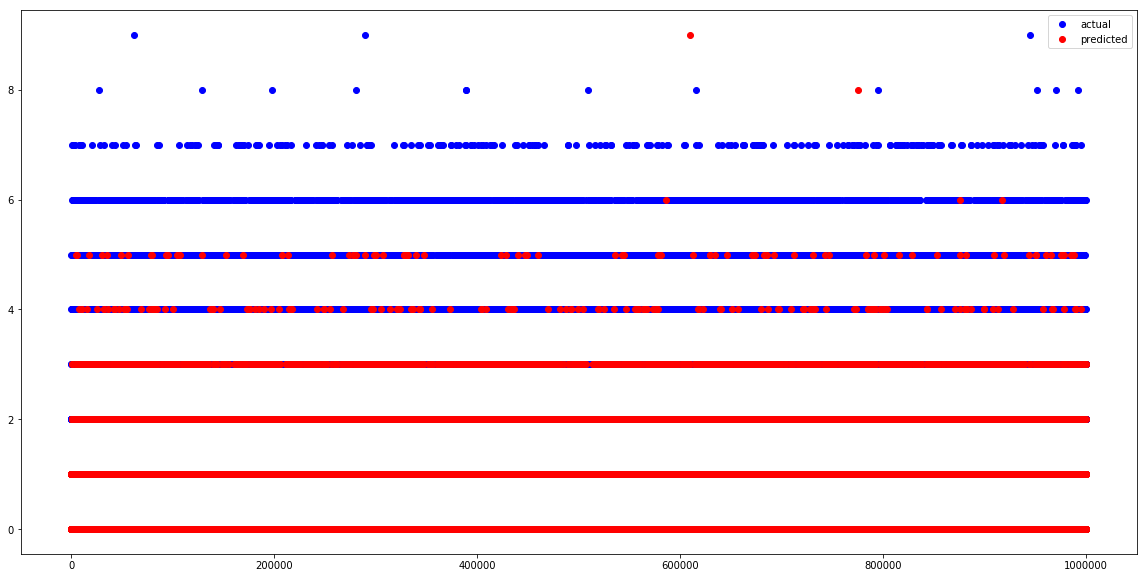

In [61]:
print(metrics.classification_report(label_test,label_predict,target_names = label_names))
print(metrics.confusion_matrix(label_test, label_predict))
skplt.metrics.plot_confusion_matrix(label_test, label_predict, normalize=True, figsize=(20,10))

plt.figure(figsize=(20,10))
plt.plot(label_test, 'bo', label='actual')
plt.plot(label_predict, 'ro', label='predicted')
plt.legend()

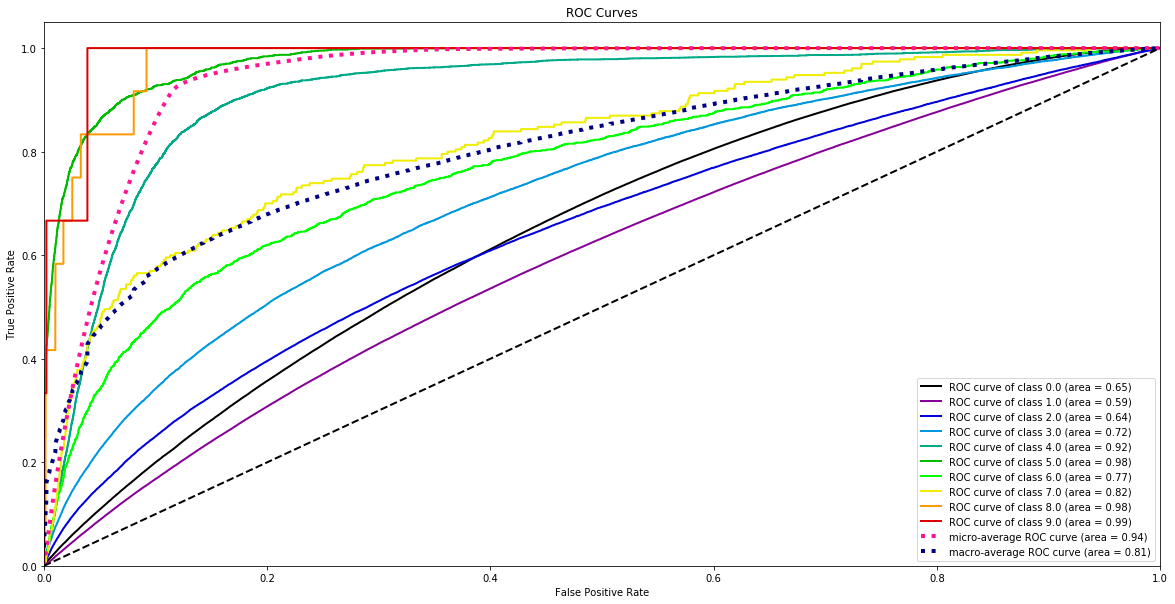

In [62]:
label_predict_prob = SVM.predict_proba(data_test)
skplt.metrics.plot_roc(label_test, label_predict_prob, figsize=(20,10))
plt.show()

## Linear Regression

The accuracy score using Linear Regression is -0.000285000198227.
('Explained Variance is ', -0.26085741638953697)
(0.3786953835338245, 0.40171761558755503)


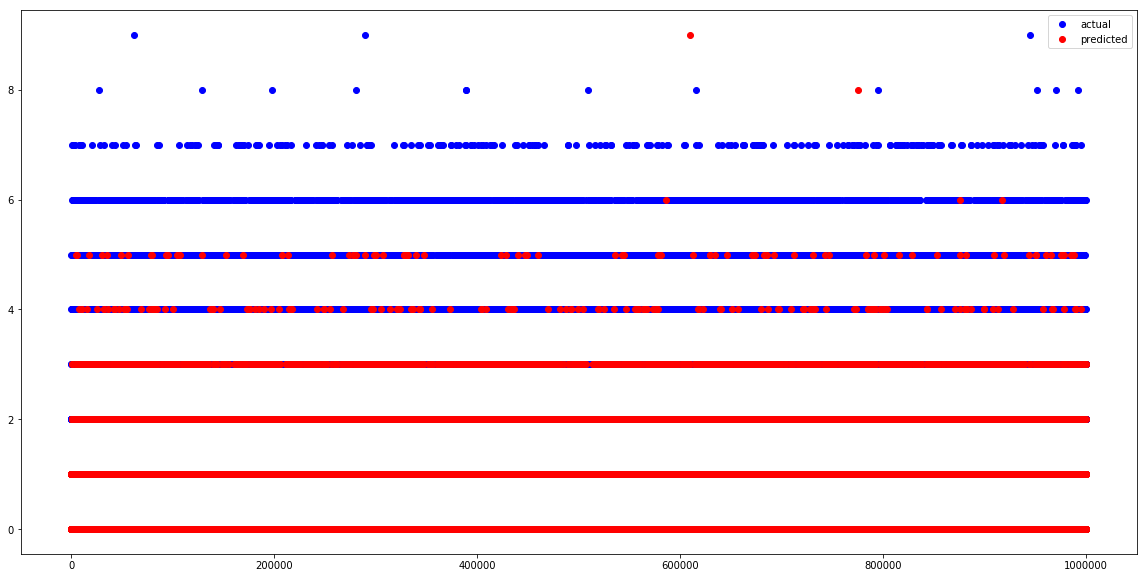

In [29]:
#Linear Regression
LinRA = linear_model.LinearRegression()

label_predict_test = LinRA.fit(data_train, label_train).predict(data_test)
label_predict_train = LinRA.fit(data_train, label_train).predict(data_train)

error_train = 1-metrics.mean_squared_error(label_train, label_predict_train)
error_test = 1-metrics.mean_squared_error(label_test, label_predict_test)

In [ ]:
print("Explained Variance is ",metrics.explained_variance_score(label_test, label_predict))
print(error_train, error_test)

plt.figure(figsize=(20,10))
plt.plot(label_test, 'bo', label='actual')
plt.plot(label_predict, 'ro', label='predicted')
plt.legend()

## Decision Tree

In [37]:
#Desicion Tree
Tree = tree.DecisionTreeClassifier(max_depth = 7)
label_predict = Tree.fit(data_train, label_train).predict(data_test)

                 precision    recall  f1-score   support

Nothing in hand       0.55      0.75      0.63    501209
       One pair       0.48      0.36      0.41    422498
      Two pairs       0.25      0.01      0.03     47622
Three of a kind       0.31      0.00      0.01     21121
       Straight       0.00      0.00      0.00      3885
          Flush       0.99      0.19      0.32      1996
     Full house       0.00      0.00      0.00      1424
 Four of a kind       0.00      0.00      0.00       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

      micro avg       0.53      0.53      0.53   1000000
      macro avg       0.26      0.13      0.14   1000000
   weighted avg       0.50      0.53      0.49   1000000

[[375958 125251      0      0      0      0      0      0      0      0]
 [270902 150002   1448    146      0      0      0      0      0      0]
 [ 26044  20825    697     56      0      0      0   

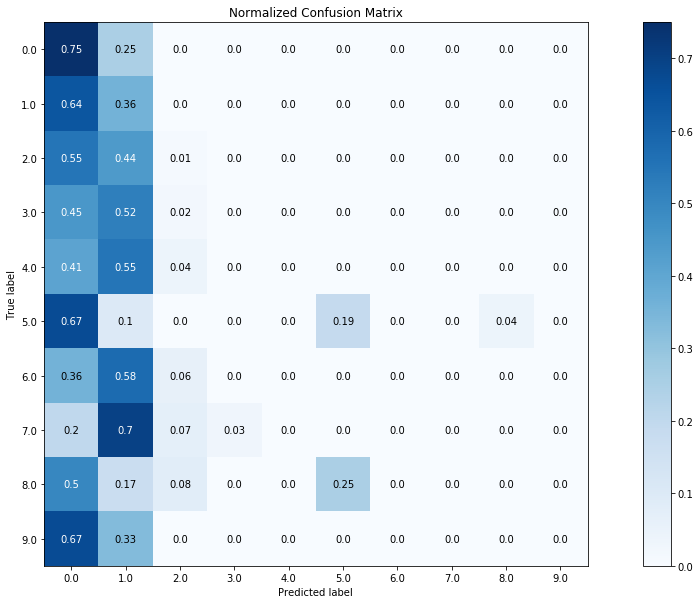

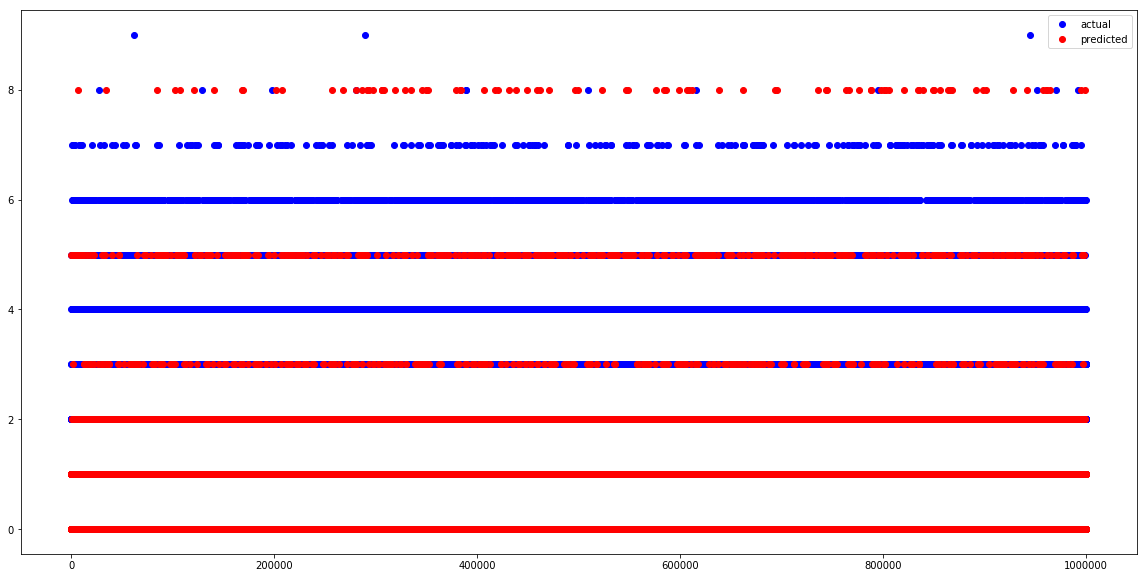

In [54]:
print(metrics.classification_report(label_test,label_predict,target_names = label_names))
print(metrics.confusion_matrix(label_test, label_predict))
skplt.metrics.plot_confusion_matrix(label_test, label_predict, normalize=True, figsize=(20,10))

plt.figure(figsize=(20,10))
plt.plot(label_test, 'bo', label='actual')
plt.plot(label_predict, 'ro', label='predicted')
plt.legend()

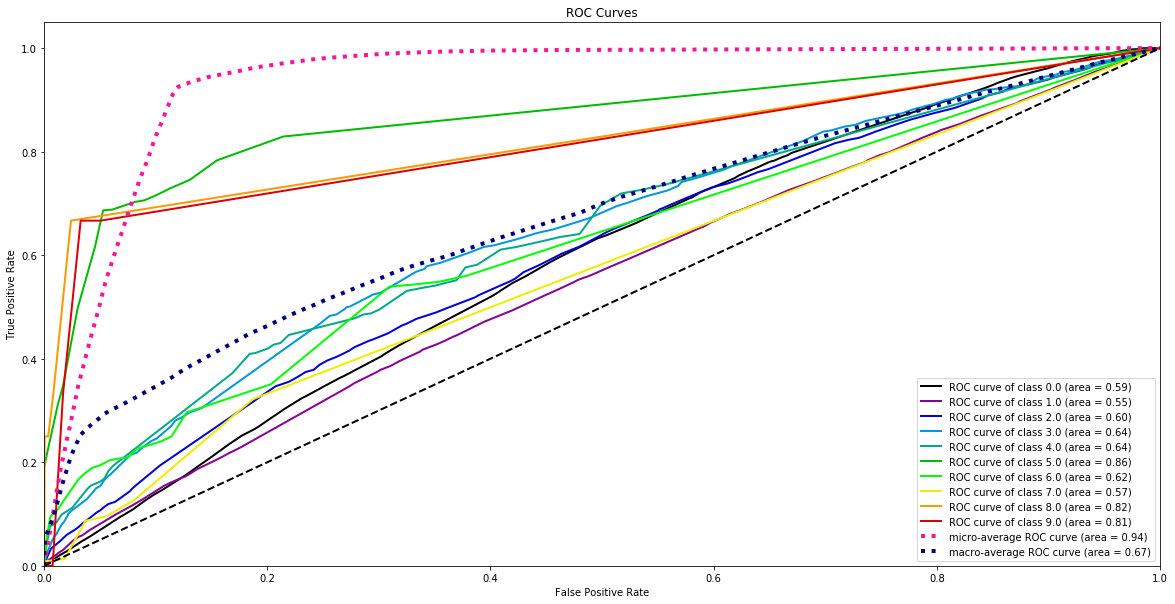

In [56]:
label_predict_prob = Tree.predict_proba(data_test)
skplt.metrics.plot_roc(label_test, label_predict_prob, figsize=(20,10))
plt.show()

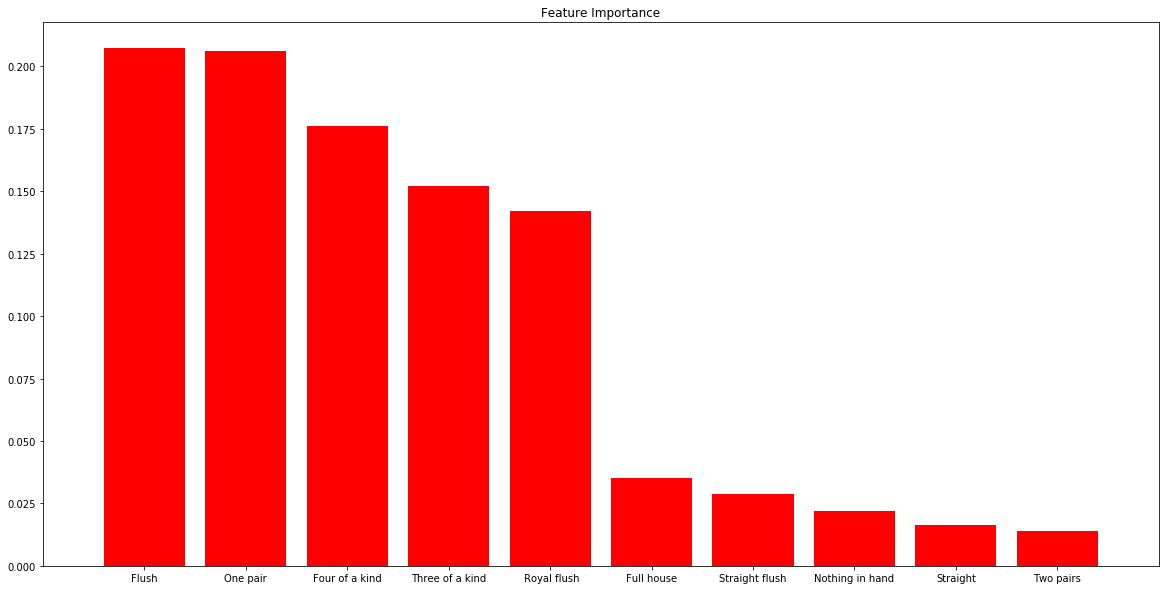

In [65]:
skplt.estimators.plot_feature_importances(Tree, feature_names=label_names, figsize=(20,10))

## KNN

In [58]:
#KNN
knn = neighbors.KNeighborsClassifier()
label_predict = knn.fit(data_train, label_train).predict(data_test)
score = knn.score(data_test, label_test)

The accuracy score using KNN is 0.51184.
                 precision    recall  f1-score   support

Nothing in hand       0.55      0.66      0.60    501209
       One pair       0.46      0.42      0.44    422498
      Two pairs       0.16      0.01      0.02     47622
Three of a kind       0.11      0.01      0.01     21121
       Straight       0.04      0.00      0.00      3885
          Flush       0.58      0.02      0.04      1996
     Full house       0.00      0.00      0.00      1424
 Four of a kind       0.00      0.00      0.00       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

      micro avg       0.51      0.51      0.51   1000000
      macro avg       0.19      0.11      0.11   1000000
   weighted avg       0.48      0.51      0.49   1000000

[[331580 168513    883    197     15     21      0      0      0      0]
 [240299 179459   2025    622     78     12      2      0      0      1]
 [ 23706  23

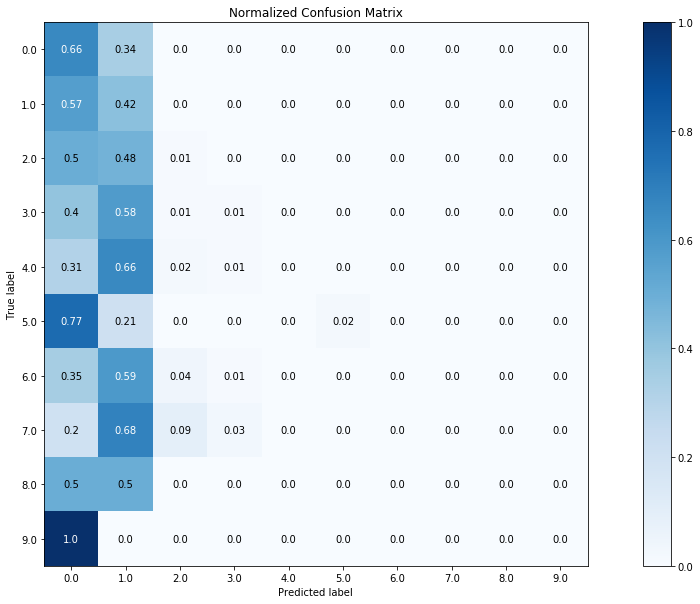

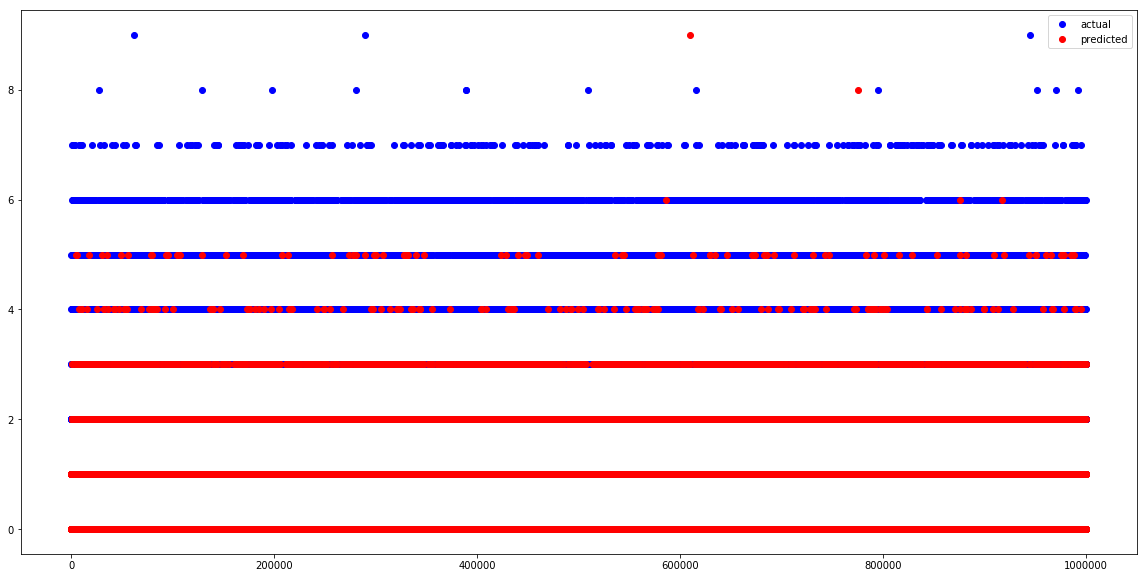

In [59]:
print("The accuracy score using KNN is {}.".format(score))
print(metrics.classification_report(label_test,label_predict,target_names = label_names))
print(metrics.confusion_matrix(label_test, label_predict))
skplt.metrics.plot_confusion_matrix(label_test, label_predict, normalize=True, figsize=(20,10))

plt.figure(figsize=(20,10))
plt.plot(label_test, 'bo', label='actual')
plt.plot(label_predict, 'ro', label='predicted')
plt.legend()

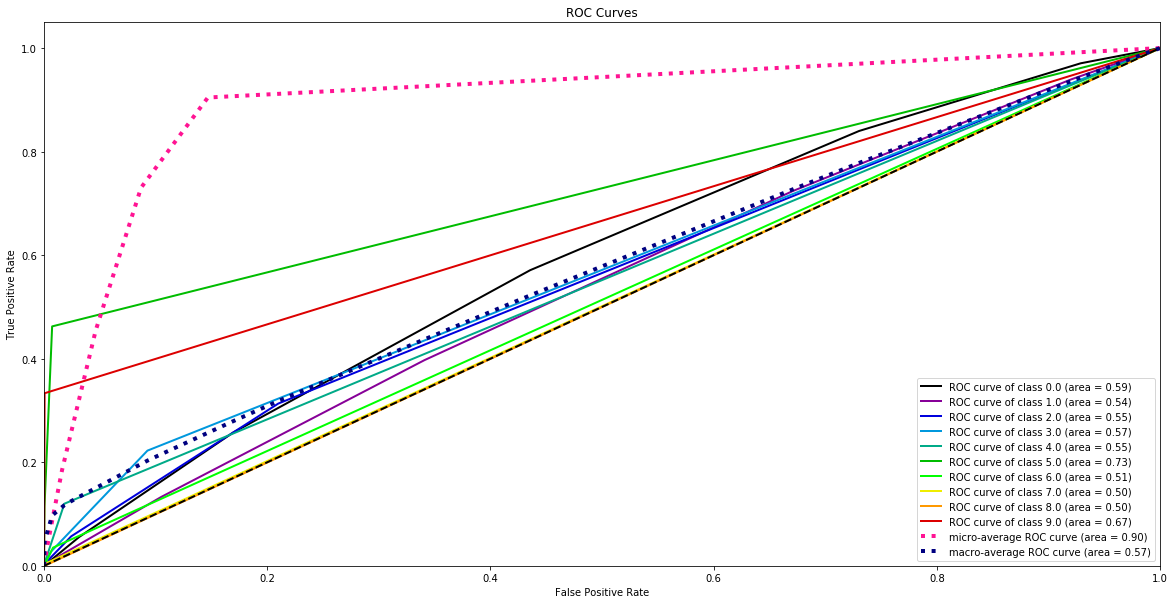

In [60]:
label_predict_prob = knn.predict_proba(data_test)
skplt.metrics.plot_roc(label_test, label_predict_prob, figsize=(20,10))
plt.show()

## SVM radical

In [77]:
#SVM Linear
SVM = svm.SVC(kernel='rbf',probability=True)
label_predict = SVM.fit(data_train, label_train).predict(data_test)
score = SVM.score(data_test, label_test)

print("The accuracy score using SVM is {}.".format(score))
print("Explained Variance is ",metrics.explained_variance_score(label_test, label_predict))

The accuracy score using SVM is 0.556786.
('Explained Variance is ', -0.05683647091805111)


                 precision    recall  f1-score   support

Nothing in hand       0.57      0.82      0.67    501209
       One pair       0.53      0.34      0.41    422498
      Two pairs       0.00      0.00      0.00     47622
Three of a kind       0.00      0.00      0.00     21121
       Straight       0.00      0.00      0.00      3885
          Flush       0.00      0.00      0.00      1996
     Full house       0.00      0.00      0.00      1424
 Four of a kind       0.00      0.00      0.00       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

      micro avg       0.56      0.56      0.56   1000000
      macro avg       0.11      0.12      0.11   1000000
   weighted avg       0.51      0.56      0.51   1000000

[[413039  88170      0      0      0      0      0      0      0      0]
 [278751 143747      0      0      0      0      0      0      0      0]
 [ 25180  22442      0      0      0      0      0   

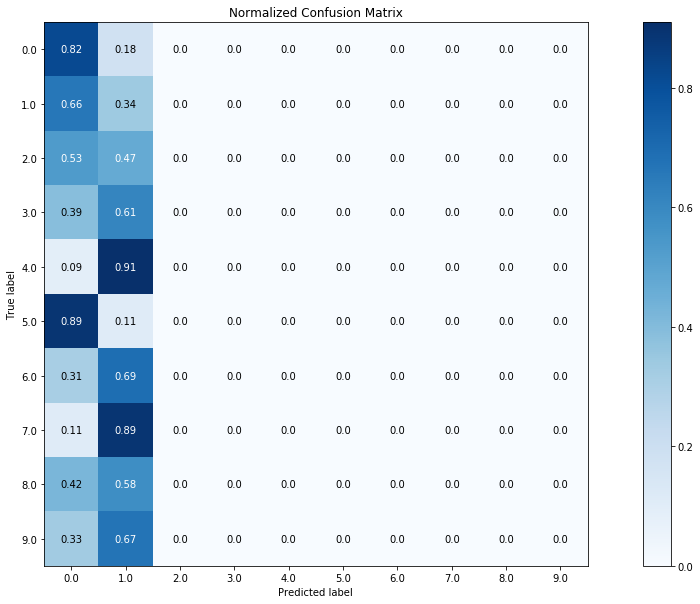

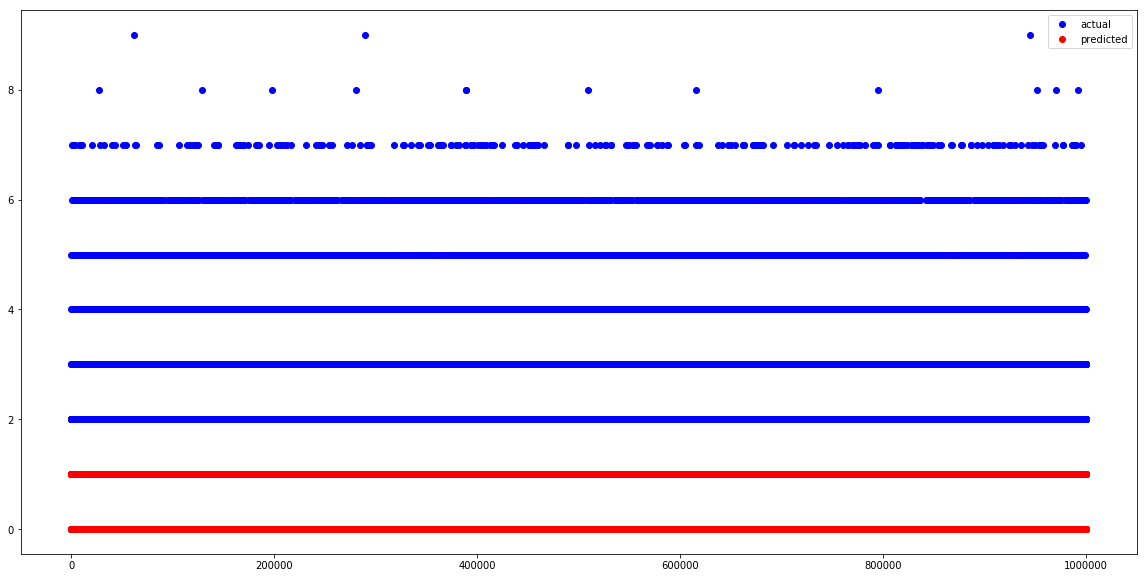

In [78]:
print(metrics.classification_report(label_test,label_predict,target_names = label_names))
print(metrics.confusion_matrix(label_test, label_predict))
skplt.metrics.plot_confusion_matrix(label_test, label_predict, normalize=True, figsize=(20,10))

plt.figure(figsize=(20,10))
plt.plot(label_test, 'bo', label='actual')
plt.plot(label_predict, 'ro', label='predicted')
plt.legend()

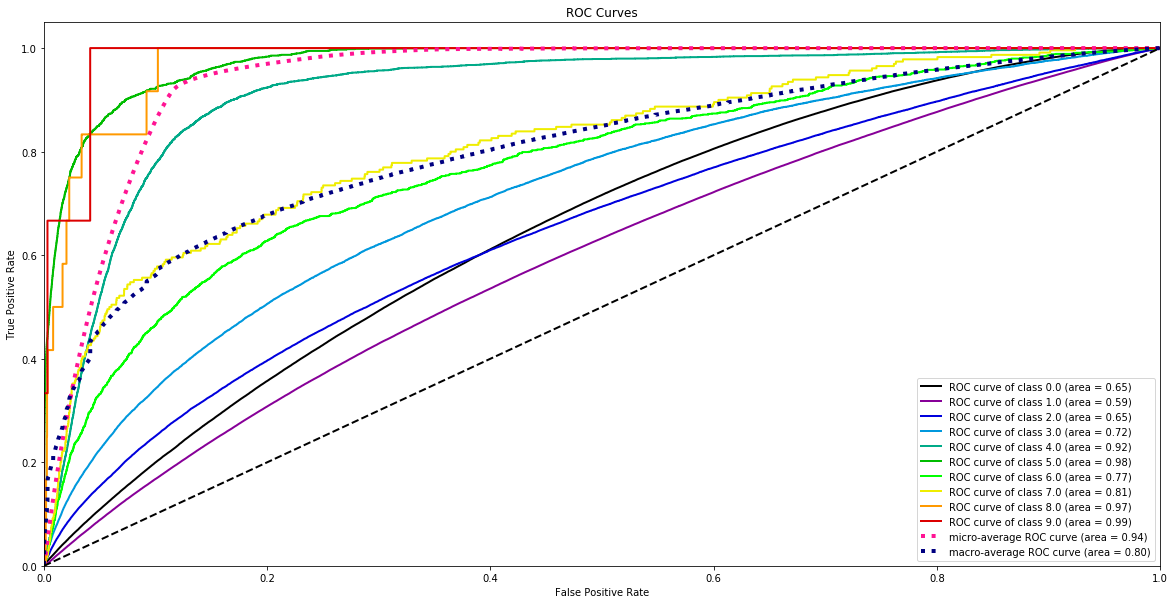

In [79]:
label_predict_prob = SVM.predict_proba(data_test)
skplt.metrics.plot_roc(label_test, label_predict_prob, figsize=(20,10))
plt.show()

## MLP

In [84]:
MLP = neural_network.MLPClassifier(solver = 'adam', alpha = 1e-5, hidden_layer_sizes = (64, 64),
                       activation = 'tanh', learning_rate_init = 0.02, max_iter = 2000, random_state = 1)  
label_predict = MLP.fit(data_train, label_train).predict(data_test)
score = MLP.score(data_test, label_test)

print("The accuracy score using SVM is {}.".format(score))
print("Explained Variance is ",metrics.explained_variance_score(label_test, label_predict))

The accuracy score using SVM is 0.987462.
('Explained Variance is ', 0.7619522908879032)


                 precision    recall  f1-score   support

Nothing in hand       0.99      1.00      0.99    501209
       One pair       1.00      1.00      1.00    422498
      Two pairs       0.92      0.99      0.96     47622
Three of a kind       0.92      0.81      0.86     21121
       Straight       0.48      0.14      0.21      3885
          Flush       0.31      0.12      0.17      1996
     Full house       0.92      0.22      0.36      1424
 Four of a kind       0.18      0.27      0.22       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

      micro avg       0.99      0.99      0.99   1000000
      macro avg       0.57      0.45      0.48   1000000
   weighted avg       0.99      0.99      0.99   1000000

[[499929    207      0      0    558    477      0      0     20     18]
 [   166 422249     26      0      7     40      0      0      2      8]
 [     0    341  47045    229      0      0      0   

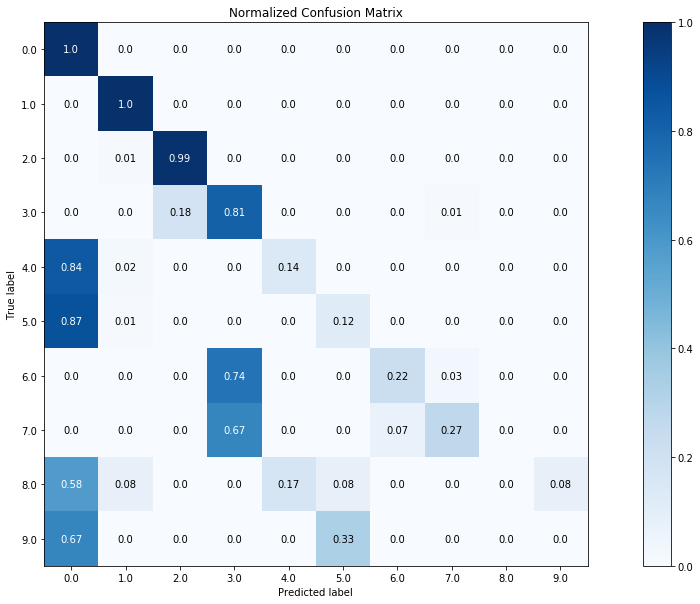

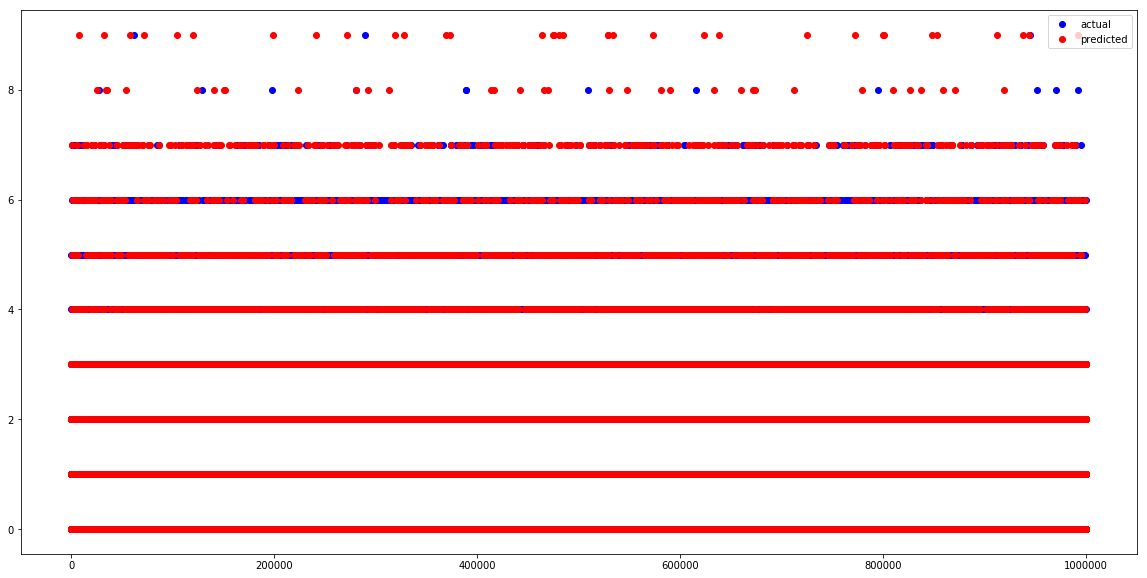

In [85]:
print(metrics.classification_report(label_test,label_predict,target_names = label_names))
print(metrics.confusion_matrix(label_test, label_predict))
skplt.metrics.plot_confusion_matrix(label_test, label_predict, normalize=True, figsize=(20,10))

plt.figure(figsize=(20,10))
plt.plot(label_test, 'bo', label='actual')
plt.plot(label_predict, 'ro', label='predicted')
plt.legend()

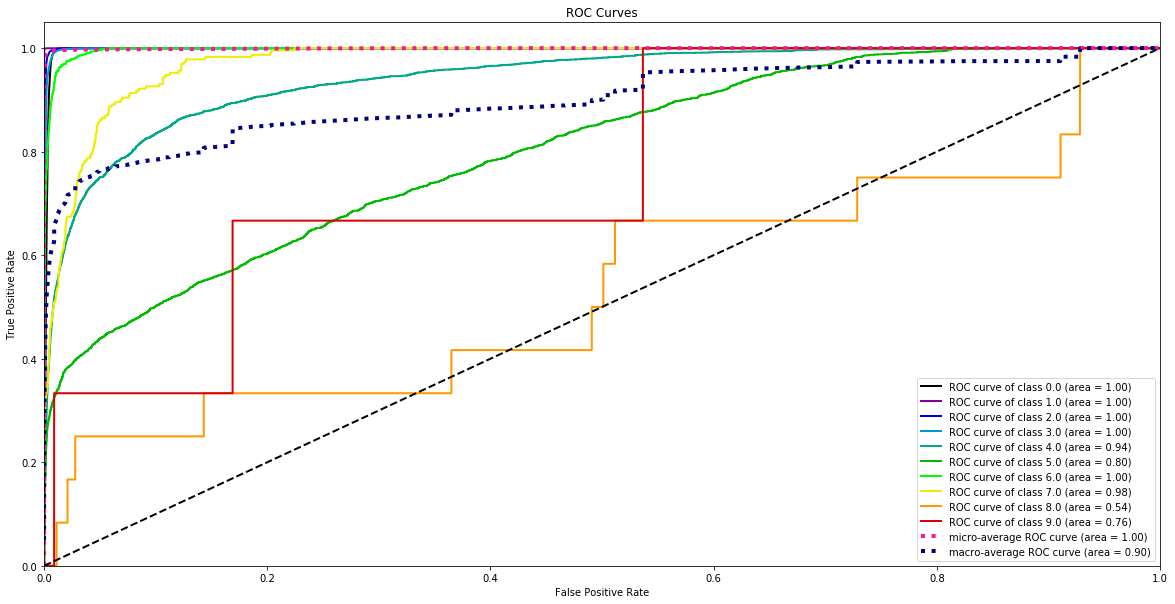

In [86]:
label_predict_prob = MLP.predict_proba(data_test)
skplt.metrics.plot_roc(label_test, label_predict_prob, figsize=(20,10))
plt.show()

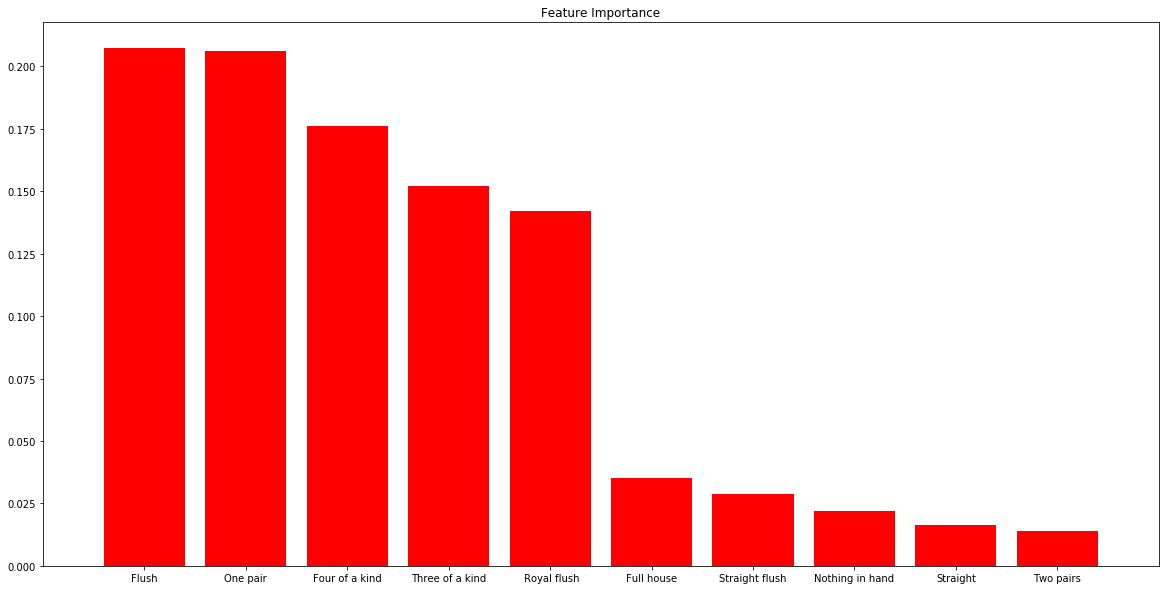

In [87]:
skplt.estimators.plot_feature_importances(Tree, feature_names=label_names, figsize=(20,10))